In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3 *X[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame({'X': X.reshape(100),'y':y})
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


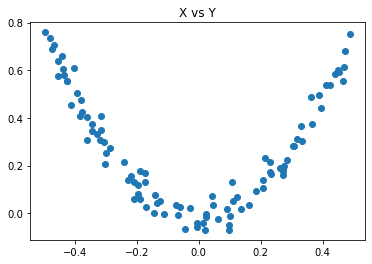

In [4]:
plt.scatter(df.X,df.y)
plt.title('X vs Y')
plt.show()

In [5]:
# creating model-1
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [6]:
df['res1'] = df['y'] - df['pred1']
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


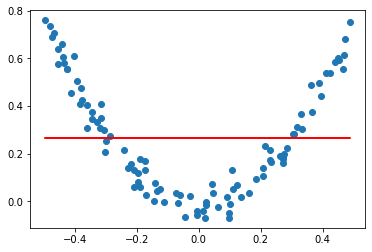

In [7]:
plt.scatter(df.X,df.y)
plt.plot(df.X,df.pred1,c='r')

In [8]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df.X.values.reshape(100,1),df.res1.values)

DecisionTreeRegressor(max_leaf_nodes=8)

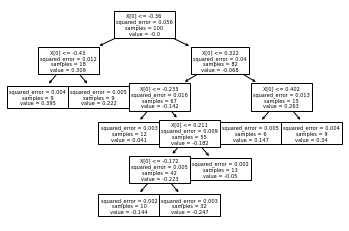

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt1)
plt.show()

In [10]:
# generating X_test
X_test = np.linspace(-0.5,0.5,500)
X_test.shape

(500,)

In [11]:
y_pred = df['y'].mean() + dt1.predict(X_test.reshape(500,1))

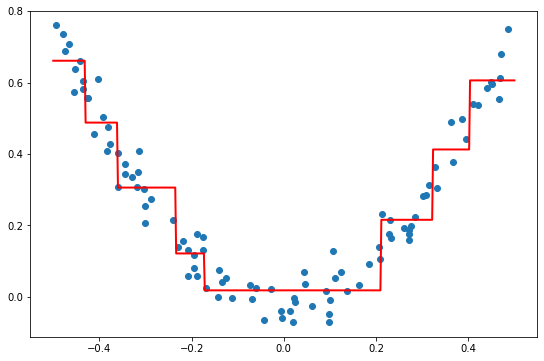

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(X_test,y_pred, linewidth=2, color='r')
plt.scatter(df.X,df.y)

In [14]:
df['pred2'] = df['y'].mean() + dt1.predict(df.X.values.reshape(100,1))

In [15]:
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965


In [16]:
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021


In [17]:
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)
dt2.fit(df.X.values.reshape(100,1),df.res2.values)


DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
y_pred = df['y'].mean() + sum(dt.predict(X_test.reshape(-1,1)) for dt in [dt1,dt2])

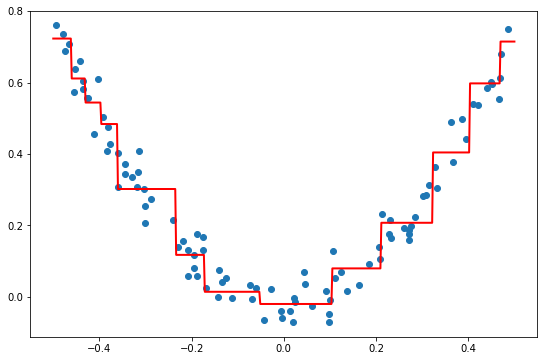

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(X_test,y_pred, linewidth=2, color='r')
plt.scatter(df.X,df.y)

In [29]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):
    
    if number == 0:
        return
    else:
        # do gradient boosting
        
        if count> 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y
        dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
        dt1.fit(X,y)
        
        regs.append(dt1)
        
        x1 = np.linspace(-0.5,0.5,500)
        
        y_pred = y.mean() + lr * sum(dt.predict(x1.reshape(-1,1)) for dt in regs)
        
        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], foo,"r.")
        plt.show()

        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

        
            

5


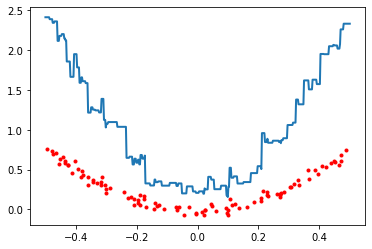

4


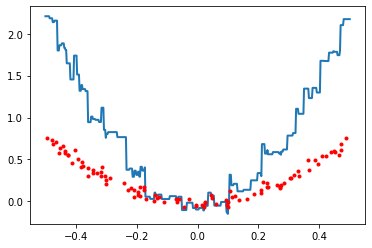

3


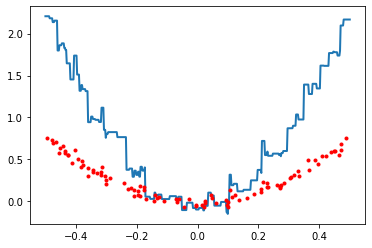

2


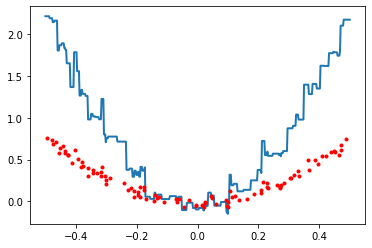

1


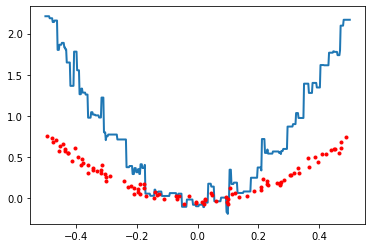

In [32]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)
